# 📊 Exploratory Data Analysis: Heart Failure Clinical Dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset
df = pd.read_csv('E:/hospital_analytics_project/data/raw/heart_failure_clinical_records_dataset.csv')
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print("Shape:", df.shape)
print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Types:")
print(df.dtypes)

print("\nTarget Distribution:")
print(df['DEATH_EVENT'].value_counts(normalize=True))


Shape: (299, 13)

Missing Values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Data Types:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Target Distribution:
DEATH_EVENT
0    0.67893
1    0.32107
Name: pr

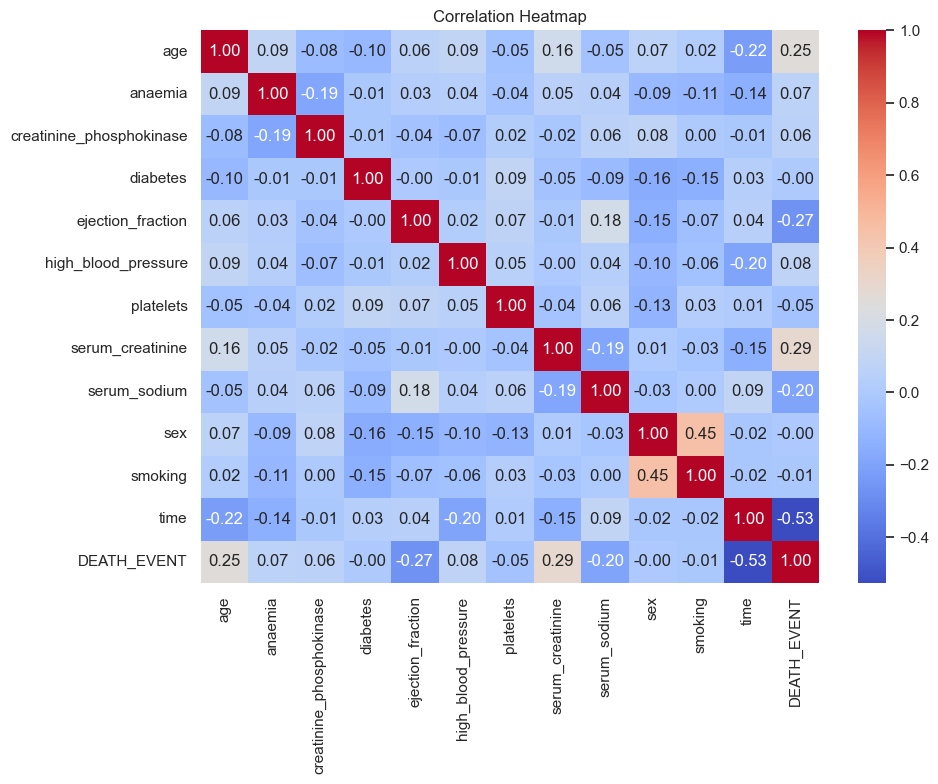

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_15384\1517280060.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT", y="age", data=df, ax=axs[0], palette='Set2')
C:\Users\MSI\AppData\Local\Temp\ipykernel_15384\1517280060.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df, ax=axs[1], palette='Set2')
C:\Users\MSI\AppData\Local\Temp\ipykernel_15384\1517280060.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="DEATH_EVENT", y="serum_creatinine", data=df, ax=axs[2], palette='Set2')


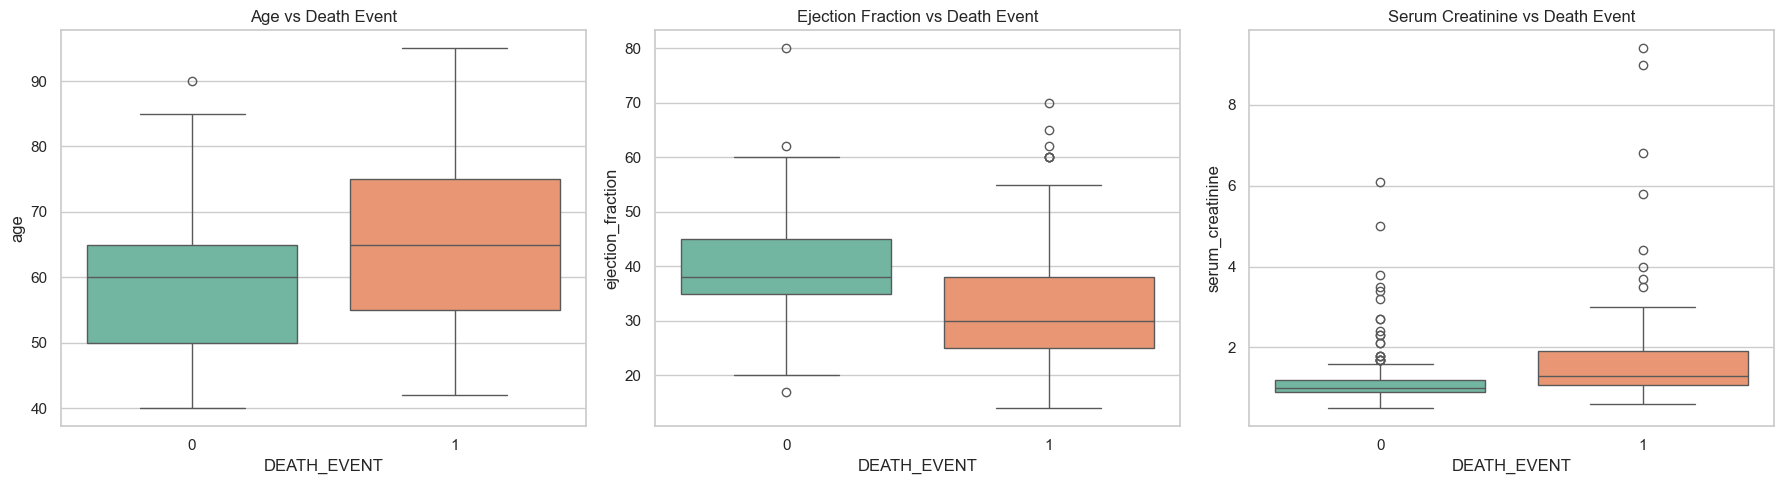

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="DEATH_EVENT", y="age", data=df, ax=axs[0], palette='Set2')
axs[0].set_title("Age vs Death Event")

sns.boxplot(x="DEATH_EVENT", y="ejection_fraction", data=df, ax=axs[1], palette='Set2')
axs[1].set_title("Ejection Fraction vs Death Event")

sns.boxplot(x="DEATH_EVENT", y="serum_creatinine", data=df, ax=axs[2], palette='Set2')
axs[2].set_title("Serum Creatinine vs Death Event")

plt.tight_layout()
plt.show()


## 🧠 Feature Engineering

In [6]:
df['is_elderly'] = (df['age'] > 65).astype(int)
df['low_ejection'] = (df['ejection_fraction'] < 30).astype(int)
df['high_creatinine'] = (df['serum_creatinine'] > 1.5).astype(int)

# Simple risk score based on 3 conditions
df['combined_risk_score'] = df['is_elderly'] + df['low_ejection'] + df['high_creatinine']

df[['age', 'ejection_fraction', 'serum_creatinine', 'is_elderly', 'low_ejection', 'high_creatinine', 'combined_risk_score']].head()


,age,ejection_fraction,serum_creatinine,is_elderly,low_ejection,high_creatinine,combined_risk_score
0,75.0,20,1.9,1,1,1,3
1,55.0,38,1.1,0,0,0,0
2,65.0,20,1.3,0,1,0,1
3,50.0,20,1.9,0,1,1,2
4,65.0,20,2.7,0,1,1,2
